In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
# import seaborn as sns
# import plotly.express as px
# from itertools import product
# import warnings
# import statsmodels.api as sm
plt.style.use('seaborn-darkgrid')

In [3]:
bitstamp = pd.read_csv("./bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv")
bitstamp.head()

Timestamp  Open  High   Low  Close  Volume_(BTC)  Volume_(Currency)  \
0  1325317920  4.39  4.39  4.39   4.39      0.455581                2.0   
1  1325317980   NaN   NaN   NaN    NaN           NaN                NaN   
2  1325318040   NaN   NaN   NaN    NaN           NaN                NaN   
3  1325318100   NaN   NaN   NaN    NaN           NaN                NaN   
4  1325318160   NaN   NaN   NaN    NaN           NaN                NaN   

   Weighted_Price  
0            4.39  
1             NaN  
2             NaN  
3             NaN  
4             NaN

In [4]:
bitstamp_non_indexed = bitstamp.copy()

In [5]:
bitstamp['Timestamp'] = [datetime.fromtimestamp(x) for x in bitstamp['Timestamp']]

In [6]:
bitstamp.head()

Timestamp  Open  High   Low  Close  Volume_(BTC)  \
0 2011-12-31 13:22:00  4.39  4.39  4.39   4.39      0.455581   
1 2011-12-31 13:23:00   NaN   NaN   NaN    NaN           NaN   
2 2011-12-31 13:24:00   NaN   NaN   NaN    NaN           NaN   
3 2011-12-31 13:25:00   NaN   NaN   NaN    NaN           NaN   
4 2011-12-31 13:26:00   NaN   NaN   NaN    NaN           NaN   

   Volume_(Currency)  Weighted_Price  
0                2.0            4.39  
1                NaN             NaN  
2                NaN             NaN  
3                NaN             NaN  
4                NaN             NaN

<AxesSubplot:title={'center':'Bitcoin Weighted Price'}, xlabel='Timestamp'>

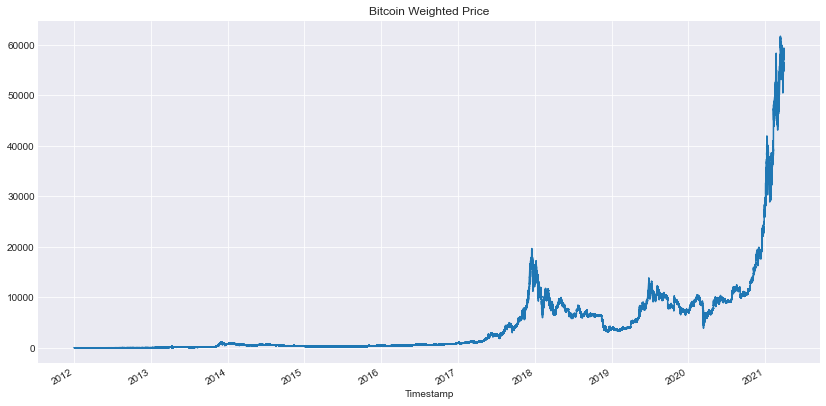

In [7]:
bitstamp.set_index("Timestamp").Weighted_Price.plot(figsize=(14,7), title="Bitcoin Weighted Price")

In [ ]:
missing_values = bitstamp.isnull().sum()
missing_per = (missing_values/bitstamp.shape[0])*100
missing_table = pd.concat([missing_values,missing_per], axis=1, ignore_index=True) 
missing_table.rename(columns={0:'Total Missing Values',1:'Missing %'}, inplace=True)
missing_table

In [8]:
bitstamp.head()

Timestamp  Open  High   Low  Close  Volume_(BTC)  \
0 2011-12-31 13:22:00  4.39  4.39  4.39   4.39      0.455581   
1 2011-12-31 13:23:00   NaN   NaN   NaN    NaN           NaN   
2 2011-12-31 13:24:00   NaN   NaN   NaN    NaN           NaN   
3 2011-12-31 13:25:00   NaN   NaN   NaN    NaN           NaN   
4 2011-12-31 13:26:00   NaN   NaN   NaN    NaN           NaN   

   Volume_(Currency)  Weighted_Price  
0                2.0            4.39  
1                NaN             NaN  
2                NaN             NaN  
3                NaN             NaN  
4                NaN             NaN

In [9]:

pd.set_option('display.max_rows', 1500)

a = bitstamp.set_index('Timestamp')

a = a['2019-11-01 00:15:00':'2019-11-01 02:24:00']

a['ffill'] = a['Weighted_Price'].fillna(method='ffill') # Imputation using ffill/pad
a['bfill'] = a['Weighted_Price'].fillna(method='bfill') # Imputation using bfill/pad
a['interp'] = a['Weighted_Price'].interpolate()         # Imputation using interpolation
a

Open     High      Low    Close  Volume_(BTC)  \
Timestamp                                                               
2019-11-01 00:15:00  9245.61  9245.61  9238.70  9238.70      1.303696   
2019-11-01 00:16:00  9237.75  9249.94  9237.75  9242.09      4.442168   
2019-11-01 00:17:00  9242.09  9250.73  9242.09  9247.59      0.200352   
2019-11-01 00:18:00  9247.20  9256.96  9247.20  9256.96      1.254069   
2019-11-01 00:19:00  9247.34  9257.51  9247.24  9257.48      0.138718   
2019-11-01 00:20:00  9257.49  9257.49  9247.24  9247.44      0.221101   
2019-11-01 00:21:00  9247.49  9249.07  9247.24  9247.24      1.063803   
2019-11-01 00:22:00  9247.27  9254.23  9244.18  9254.00      2.019336   
2019-11-01 00:23:00  9244.85  9253.95  9243.98  9253.50      1.230669   
2019-11-01 00:24:00  9244.01  9253.24  9239.74  9242.85      1.199450   
2019-11-01 00:25:00  9253.24  9253.24  9242.85  9242.85      0.240920   
2019-11-01 00:26:00  9242.85  9250.40  9238.15  9238.15      1.067375   
2019-11-01 00:27:00  9238.15  9244.15  9238.15  9238.15      0.314877   
2019-11-01 00:28:00  9238.15  9242.68  9238.15  9238.15      0.162275   
2019-11-01 00:29:00  9238.15  9246.10  9238.15  9246.07      0.259525   
2019-11-01 00:30:00  9246.07  9251.05  9244.00  9251.05      0.951589   
2019-11-01 00:31:00  9245.76  9251.03  9244.00  9244.00      0.090007   
2019-11-01 00:32:00  9244.00  9251.00  9244.00  9247.07      0.453083   
2019-11-01 00:33:00  9244.03  9245.12  9244.03  9244.03      1.089239   
2019-11-01 00:34:00  9244.03  9251.03  9244.00  9244.00      0.183219   
2019-11-01 00:35:00  9244.00  9245.24  9244.00  9244.00      0.534211   
2019-11-01 00:36:00  9244.00  9251.02  9239.89  9251.02      1.966292   
2019-11-01 00:37:00  9251.02  9251.02  9241.29  9241.29      1.889829   
2019-11-01 00:38:00  9242.98  9245.37  9239.79  9239.82      0.029746   
2019-11-01 00:39:00  9239.82  9247.21  9239.82  9239.83      0.214851   
2019-11-01 00:40:00  9239.83  9246.11  9237.29  9243.28     10.535977   
2019-11-01 00:41:00  9237.49  9244.00  9227.45  9227.45      6.862695   
2019-11-01 00:42:00  9227.44  9240.30  9225.51  9234.93      0.667988   
2019-11-01 00:43:00  9225.52  9228.12  9225.51  9225.51      0.048905   
2019-11-01 00:44:00  9225.51  9228.84  9223.00  9223.00      0.513815   
2019-11-01 00:45:00  9228.84  9233.34  9220.03  9233.34      0.371585   
2019-11-01 00:46:00  9221.98  9236.05  9221.98  9232.40     15.798904   
2019-11-01 00:47:00  9236.16  9236.72  9229.50  9234.08      0.129632   
2019-11-01 00:48:00  9229.51  9239.54  9229.51  9229.64      0.855691   
2019-11-01 00:49:00  9235.86  9239.18  9229.54  9230.32     22.027157   
2019-11-01 00:50:00  9237.94  9239.99  9232.16  9232.37      0.157768   
2019-11-01 00:51:00  9233.12  9242.04  9231.61  9231.61      0.538655   
2019-11-01 00:52:00  9232.94  9236.97  9225.17  9225.17      1.456317   
2019-11-01 00:53:00  9230.43  9236.96  9224.96  9224.96      0.941851   
2019-11-01 00:54:00  9227.71  9236.09  9224.88  9224.91      0.806320   
2019-11-01 00:55:00  9222.99  9223.09  9222.99  9223.09      0.332062   
2019-11-01 00:56:00  9223.09  9232.29  9223.09  9223.09      0.060559   
2019-11-01 00:57:00  9223.09  9234.54  9223.09  9226.46      0.510952   
2019-11-01 00:58:00  9226.46  9230.16  9226.46  9226.59      0.048169   
2019-11-01 00:59:00  9230.21  9233.86  9222.58  9231.58      2.294447   
2019-11-01 01:00:00  9231.58  9233.72  9222.72  9222.74      0.546739   
2019-11-01 01:01:00  9222.74  9224.01  9222.72  9224.00      0.061157   
2019-11-01 01:02:00  9224.00  9232.36  9222.72  9222.96      8.689936   
2019-11-01 01:03:00  9222.96  9233.86  9222.96  9223.87      2.142376   
2019-11-01 01:04:00  9224.52  9232.56  9222.72  9232.56      0.838535   
2019-11-01 01:05:00  9225.00  9236.14  9225.00  9236.14      4.058952   
2019-11-01 01:06:00  9236.13  9236.14  9226.45  9226.48      2.187634   
2019-11-01 01:07:00  9231.11  9242.46  9231.11  9233.65      0.060665   
2019-11-0

In [10]:
def fill_missing(df):
    ### function to impute missing values using interpolation ###
    df['Open'] = df['Open'].interpolate()
    df['Close'] = df['Close'].interpolate()
    df['Weighted_Price'] = df['Weighted_Price'].interpolate()

    df['Volume_(BTC)'] = df['Volume_(BTC)'].interpolate()
    df['Volume_(Currency)'] = df['Volume_(Currency)'].interpolate()
    df['High'] = df['High'].interpolate()
    df['Low'] = df['Low'].interpolate()

    print(df.head())
    print(df.isnull().sum())


In [11]:
fill_missing(bitstamp)

            Timestamp  Open  High   Low  Close  Volume_(BTC)  \
0 2011-12-31 13:22:00  4.39  4.39  4.39   4.39      0.455581   
1 2011-12-31 13:23:00  4.39  4.39  4.39   4.39      0.555046   
2 2011-12-31 13:24:00  4.39  4.39  4.39   4.39      0.654511   
3 2011-12-31 13:25:00  4.39  4.39  4.39   4.39      0.753977   
4 2011-12-31 13:26:00  4.39  4.39  4.39   4.39      0.853442   

   Volume_(Currency)  Weighted_Price  
0           2.000000            4.39  
1           2.436653            4.39  
2           2.873305            4.39  
3           3.309958            4.39  
4           3.746611            4.39  
Timestamp            0
Open                 0
High                 0
Low                  0
Close                0
Volume_(BTC)         0
Volume_(Currency)    0
Weighted_Price       0
dtype: int64


In [12]:
bitstamp_non_indexed = bitstamp.copy()

In [13]:
bitstamp = bitstamp.set_index('Timestamp')
bitstamp.head()

Open  High   Low  Close  Volume_(BTC)  Volume_(Currency)  \
Timestamp                                                                       
2011-12-31 13:22:00  4.39  4.39  4.39   4.39      0.455581           2.000000   
2011-12-31 13:23:00  4.39  4.39  4.39   4.39      0.555046           2.436653   
2011-12-31 13:24:00  4.39  4.39  4.39   4.39      0.654511           2.873305   
2011-12-31 13:25:00  4.39  4.39  4.39   4.39      0.753977           3.309958   
2011-12-31 13:26:00  4.39  4.39  4.39   4.39      0.853442           3.746611   

                     Weighted_Price  
Timestamp                            
2011-12-31 13:22:00            4.39  
2011-12-31 13:23:00            4.39  
2011-12-31 13:24:00            4.39  
2011-12-31 13:25:00            4.39  
2011-12-31 13:26:00            4.39

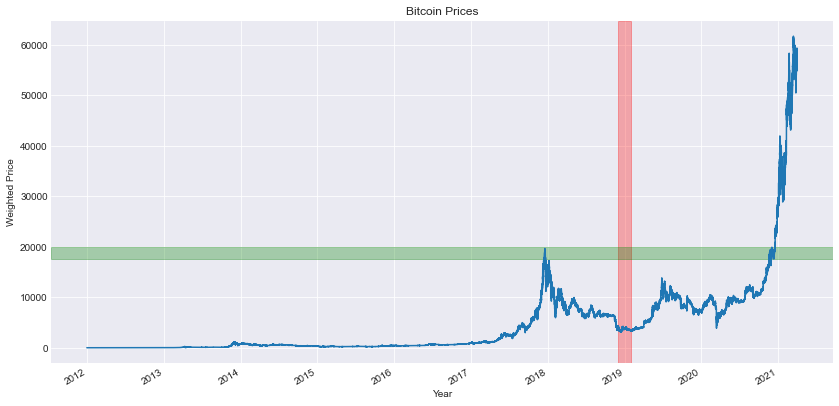

In [14]:
ax = bitstamp['Weighted_Price'].plot(title='Bitcoin Prices', grid=True, figsize=(14,7))
ax.set_xlabel('Year')
ax.set_ylabel('Weighted Price')

ax.axvspan('2018-12-01','2019-01-31',color='red', alpha=0.3)
ax.axhspan(17500,20000, color='green',alpha=0.3)

Text(0, 0.5, 'Weighted_Price')

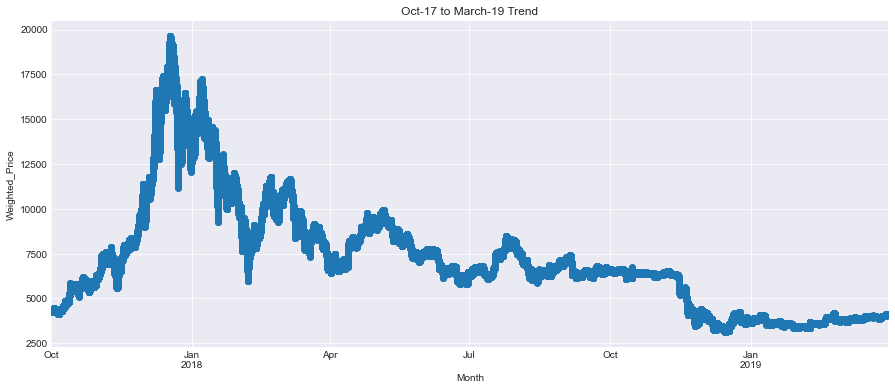

In [15]:
ax = bitstamp.loc['2017-10':'2019-03','Weighted_Price'].plot(marker='o', linestyle='-',figsize=(15,6), title="Oct-17 to March-19 Trend", grid=True)
ax.set_xlabel('Month')
ax.set_ylabel('Weighted_Price')

C:\Users\acer\AppData\Local\Temp\ipykernel_3112\491729685.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(bitstamp['Weighted_Price'], shade=True)


<AxesSubplot:xlabel='Weighted_Price', ylabel='Density'>

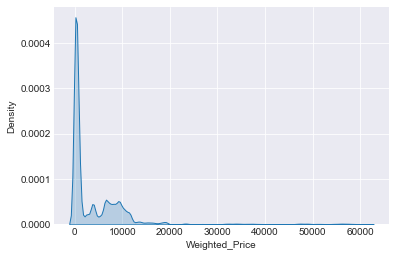

In [17]:
import seaborn as sns
sns.kdeplot(bitstamp['Weighted_Price'], shade=True)

In [18]:
hourly_data = bitstamp.resample('1H').mean()
hourly_data = hourly_data.reset_index()

hourly_data.head()

Timestamp  Open  High   Low  Close  Volume_(BTC)  \
0 2011-12-31 13:00:00  4.39  4.39  4.39   4.39      2.295689   
1 2011-12-31 14:00:00  4.39  4.39  4.39   4.39      7.169489   
2 2011-12-31 15:00:00  4.39  4.39  4.39   4.39     13.137408   
3 2011-12-31 16:00:00  4.39  4.39  4.39   4.39     19.105327   
4 2011-12-31 17:00:00  4.39  4.39  4.39   4.39     25.073246   

   Volume_(Currency)  Weighted_Price  
0          10.078075            4.39  
1          31.474059            4.39  
2          57.673222            4.39  
3          83.872385            4.39  
4         110.071548            4.39

In [19]:
bitstamp_daily = bitstamp.resample("24H").mean() #daily resampling



In [20]:
import plotly.express as px

bitstamp_daily.reset_index(inplace=True)
fig = px.line(bitstamp_daily, x='Timestamp', y='Weighted_Price', title='Weighted Price with Range Slider and Selectors')
fig.update_layout(hovermode="x")

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=2, label="2y", step="year", stepmode="backward"),
            dict(step="all")
            
        ])
    )
)
fig.show()

In [21]:

plot_ = bitstamp_daily.set_index("Timestamp")["2017-12"]

C:\Users\acer\AppData\Local\Temp\ipykernel_3112\3076710056.py:1: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.



In [22]:
price_series = bitstamp_daily.reset_index().Weighted_Price.values
price_series

array([4.42428590e+00, 4.67762540e+00, 4.99170099e+00, ...,
       5.63769377e+04, 5.80754168e+04, 5.87588914e+04])

In [23]:
fill_missing(bitstamp_daily)

   Timestamp      Open      High       Low     Close  Volume_(BTC)  \
0 2011-12-31  4.422837  4.426677  4.422837  4.426677     24.024874   
1 2012-01-01  4.677625  4.677625  4.677625  4.677625      5.883361   
2 2012-01-02  4.991701  4.991701  4.991701  4.991701     13.503075   
3 2012-01-03  5.175495  5.175495  5.175495  5.175495     11.136690   
4 2012-01-04  5.120500  5.133742  5.120500  5.133742      8.327158   

   Volume_(Currency)  Weighted_Price  
0         105.980529        4.424286  
1          27.923145        4.677625  
2          67.432386        4.991701  
3          56.749845        5.175495  
4          43.510443        5.125202  
Timestamp            0
Open                 0
High                 0
Low                  0
Close                0
Volume_(BTC)         0
Volume_(Currency)    0
Weighted_Price       0
dtype: int64


In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

ModuleNotFoundError: No module named 'statsmodels'

In [25]:
df = bitstamp_daily.set_index("Timestamp")

In [26]:

df.reset_index(drop=False, inplace=True)

lag_features = ["Open", "High", "Low", "Close","Volume_(BTC)"]
window1 = 3
window2 = 7
window3 = 30

df_rolled_3d = df[lag_features].rolling(window=window1, min_periods=0)
df_rolled_7d = df[lag_features].rolling(window=window2, min_periods=0)
df_rolled_30d = df[lag_features].rolling(window=window3, min_periods=0)

df_mean_3d = df_rolled_3d.mean().shift(1).reset_index()
df_mean_7d = df_rolled_7d.mean().shift(1).reset_index()
df_mean_30d = df_rolled_30d.mean().shift(1).reset_index()

df_std_3d = df_rolled_3d.std().shift(1).reset_index()
df_std_7d = df_rolled_7d.std().shift(1).reset_index()
df_std_30d = df_rolled_30d.std().shift(1).reset_index()

for feature in lag_features:
    df[f"{feature}_mean_lag{window1}"] = df_mean_3d[feature]
    df[f"{feature}_mean_lag{window2}"] = df_mean_7d[feature]
    df[f"{feature}_mean_lag{window3}"] = df_mean_30d[feature]
    
    df[f"{feature}_std_lag{window1}"] = df_std_3d[feature]
    df[f"{feature}_std_lag{window2}"] = df_std_7d[feature]
    df[f"{feature}_std_lag{window3}"] = df_std_30d[feature]

df.fillna(df.mean(), inplace=True)

df.set_index("Timestamp", drop=False, inplace=True)
df.head()


C:\Users\acer\AppData\Local\Temp\ipykernel_3112\3168349813.py:29: FutureWarning:

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.



Timestamp      Open      High       Low     Close  Volume_(BTC)  \
Timestamp                                                                     
2011-12-31 2011-12-31  4.422837  4.426677  4.422837  4.426677     24.024874   
2012-01-01 2012-01-01  4.677625  4.677625  4.677625  4.677625      5.883361   
2012-01-02 2012-01-02  4.991701  4.991701  4.991701  4.991701     13.503075   
2012-01-03 2012-01-03  5.175495  5.175495  5.175495  5.175495     11.136690   
2012-01-04 2012-01-04  5.120500  5.133742  5.120500  5.133742      8.327158   

            Volume_(Currency)  Weighted_Price  Open_mean_lag3  Open_mean_lag7  \
Timestamp                                                                       
2011-12-31         105.980529        4.424286     4564.752758     4532.014863   
2012-01-01          27.923145        4.677625        4.422837        4.422837   
2012-01-02          67.432386        4.991701        4.550231        4.550231   
2012-01-03          56.749845        5.175495        4.697388        4.697388   
2012-01-04          43.510443        5.125202        4.948274        4.816915   

            ...  Close_mean_lag30  Close_std_lag3  Close_std_lag7  \
Timestamp   ...                                                     
2011-12-31  ...       4342.158190      112.850620      186.071830   
2012-01-01  ...          4.426677      112.850620      186.071830   
2012-01-02  ...          4.552151        0.177447        0.177447   
2012-01-03  ...          4.698668        0.283099        0.283099   
2012-01-04  ...          4.817875        0.251760        0.332071   

            Close_std_lag30  Volume_(BTC)_mean_lag3  Volume_(BTC)_mean_lag7  \
Timestamp                                                                     
2011-12-31       417.775512                9.565484                9.572699   
2012-01-01       417.775512               24.024874               24.024874   
2012-01-02         0.177447               14.954117               14.954117   
2012-01-03         0.283099               14.470437               14.470437   
2012-01-04         0.332071               10.174375               13.637000   

            Volume_(BTC)_mean_lag30  Volume_(BTC)_std_lag3  \
Timestamp                                                    
2011-12-31                 9.590264               3.369452   
2012-01-01                24.024874               3.369452   
2012-01-02                14.954117              12.827987   
2012-01-03                14.470437               9.109362   
2012-01-04                13.637000               3.899942   

            Volume_(BTC)_std_lag7  Volume_(BTC)_std_lag30  
Timestamp                                                  
2011-12-31               4.136303                5.128796  
2012-01-01               4.136303                5.128796  
2012-01-02              12.827987               12.827987  
2012-01-03               9.109362                9.109362  
2012-01-04               7.622256                7.622256  

[5 rows x 38 columns]

In [27]:
df.to_csv('hello.csv')

In [28]:
df["month"] = df.Timestamp.dt.month
df["week"] = df.Timestamp.dt.week
df["day"] = df.Timestamp.dt.day
df["day_of_week"] = df.Timestamp.dt.dayofweek
df.head()

C:\Users\acer\AppData\Local\Temp\ipykernel_3112\3147969711.py:2: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.



Timestamp      Open      High       Low     Close  Volume_(BTC)  \
Timestamp                                                                     
2011-12-31 2011-12-31  4.422837  4.426677  4.422837  4.426677     24.024874   
2012-01-01 2012-01-01  4.677625  4.677625  4.677625  4.677625      5.883361   
2012-01-02 2012-01-02  4.991701  4.991701  4.991701  4.991701     13.503075   
2012-01-03 2012-01-03  5.175495  5.175495  5.175495  5.175495     11.136690   
2012-01-04 2012-01-04  5.120500  5.133742  5.120500  5.133742      8.327158   

            Volume_(Currency)  Weighted_Price  Open_mean_lag3  Open_mean_lag7  \
Timestamp                                                                       
2011-12-31         105.980529        4.424286     4564.752758     4532.014863   
2012-01-01          27.923145        4.677625        4.422837        4.422837   
2012-01-02          67.432386        4.991701        4.550231        4.550231   
2012-01-03          56.749845        5.175495        4.697388        4.697388   
2012-01-04          43.510443        5.125202        4.948274        4.816915   

            ...  Volume_(BTC)_mean_lag3  Volume_(BTC)_mean_lag7  \
Timestamp   ...                                                   
2011-12-31  ...                9.565484                9.572699   
2012-01-01  ...               24.024874               24.024874   
2012-01-02  ...               14.954117               14.954117   
2012-01-03  ...               14.470437               14.470437   
2012-01-04  ...               10.174375               13.637000   

            Volume_(BTC)_mean_lag30  Volume_(BTC)_std_lag3  \
Timestamp                                                    
2011-12-31                 9.590264               3.369452   
2012-01-01                24.024874               3.369452   
2012-01-02                14.954117              12.827987   
2012-01-03                14.470437               9.109362   
2012-01-04                13.637000               3.899942   

            Volume_(BTC)_std_lag7  Volume_(BTC)_std_lag30  month  week  day  \
Timestamp                                                                     
2011-12-31               4.136303                5.128796     12    52   31   
2012-01-01               4.136303                5.128796      1    52    1   
2012-01-02              12.827987               12.827987      1     1    2   
2012-01-03               9.109362                9.109362      1     1    3   
2012-01-04               7.622256                7.622256      1     1    4   

            day_of_week  
Timestamp                
2011-12-31            5  
2012-01-01            6  
2012-01-02            0  
2012-01-03            1  
2012-01-04            2  

[5 rows x 42 columns]

In [29]:
df_train = df[df.Timestamp < "2020"]
df_valid = df[df.Timestamp >= "2020"]

print('train shape :', df_train.shape)
print('validation shape :', df_valid.shape)

train shape : (2923, 42)
validation shape : (456, 42)


In [30]:
price_series = bitstamp_daily.reset_index().Weighted_Price.values
price_series

array([4.42428590e+00, 4.67762540e+00, 4.99170099e+00, ...,
       5.63769377e+04, 5.80754168e+04, 5.87588914e+04])

In [31]:
price_series.shape

(3379,)

In [32]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0, 1))
price_series_scaled = scaler.fit_transform(price_series.reshape(-1,1))

In [33]:

train_data, test_data = price_series_scaled[0:2923], price_series_scaled[2923:]

In [34]:
def windowed_dataset(series, time_step):
    dataX, dataY = [], []
    for i in range(len(series)- time_step-1):
        a = series[i : (i+time_step), 0]
        dataX.append(a)
        dataY.append(series[i+ time_step, 0])
        
    return np.array(dataX), np.array(dataY)

In [35]:
X_train, y_train = windowed_dataset(train_data, time_step=100)
X_test, y_test = windowed_dataset(test_data, time_step=100)
# X_test.save('numpy',a)
from numpy import savetxt
savetxt('data.csv', X_test, delimiter=',')

In [37]:

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
# X_test.save('numpy',a)

print(X_train.shape) 
print(X_test.shape)

(2822, 100, 1)
(355, 100, 1)


In [38]:
print(y_train.shape) 
print(y_test.shape)

(2822,)
(355,)


In [39]:
#Create Stacked LSTM Model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [40]:
# Initialising the LSTM
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [41]:
regressor.summary()

# Fitting the RNN to the Training set
history = regressor.fit(X_train, y_train, validation_split=0.1, epochs = 50, batch_size = 32, verbose=1, shuffle=False)
#

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 dropout_1 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 50)           20200     
                                                                 
 dropout_2 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                2

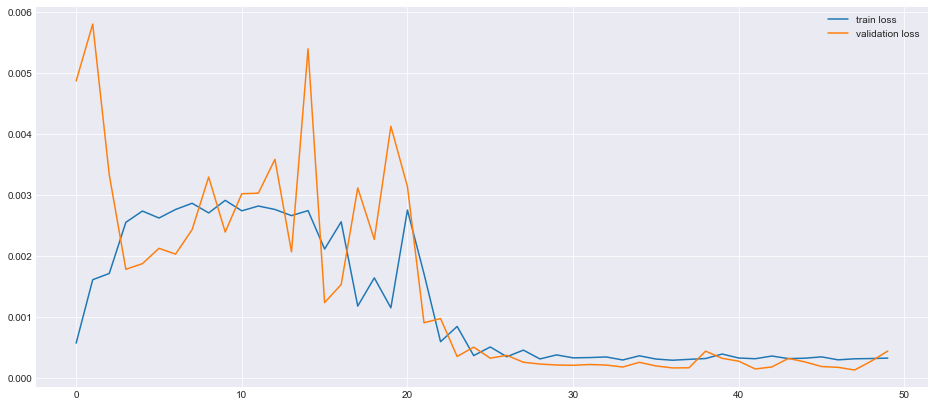

In [42]:
plt.figure(figsize=(16,7))
plt.plot(history.history["loss"], label= "train loss")
plt.plot(history.history["val_loss"], label= "validation loss")
plt.legend()

In [43]:
#Lets do the prediction and performance checking

train_predict = regressor.predict(X_train)
test_predict = regressor.predict(X_test)
print(test_predict)

[[0.0987187 ]
 [0.10020123]
 [0.1014556 ]
 [0.10232776]
 [0.10273015]
 [0.10268983]
 [0.10228604]
 [0.10163492]
 [0.10094561]
 [0.10038678]
 [0.10008449]
 [0.10006323]
 [0.10019735]
 [0.10039384]
 [0.10065699]
 [0.1010868 ]
 [0.10172508]
 [0.10257767]
 [0.10364835]
 [0.10491031]
 [0.10640218]
 [0.108426  ]
 [0.11104525]
 [0.11418433]
 [0.11770091]
 [0.12126619]
 [0.12460986]
 [0.12756504]
 [0.1301171 ]
 [0.13249606]
 [0.13478833]
 [0.13663054]
 [0.13770744]
 [0.13789031]
 [0.13731304]
 [0.13639711]
 [0.13552998]
 [0.13488162]
 [0.1345907 ]
 [0.13478154]
 [0.13543688]
 [0.13646886]
 [0.1375882 ]
 [0.13841525]
 [0.13874817]
 [0.13850406]
 [0.13758343]
 [0.13607657]
 [0.13422301]
 [0.13241617]
 [0.13105775]
 [0.13038328]
 [0.13050014]
 [0.13133234]
 [0.132855  ]
 [0.13472363]
 [0.13663459]
 [0.13837278]
 [0.13973331]
 [0.14061269]
 [0.14107078]
 [0.14122346]
 [0.14123678]
 [0.14125445]
 [0.14118527]
 [0.1409802 ]
 [0.14059773]
 [0.13993546]
 [0.13907272]
 [0.13810542]
 [0.13712609]
 [0.13

In [44]:
#transformation to original form

y_train_inv = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
train_predict_inv = scaler.inverse_transform(train_predict)
test_predict_inv = scaler.inverse_transform(test_predict)
print(y_test_inv)

[[ 7063.85140418]
 [ 6888.90011853]
 [ 6887.98397101]
 [ 6810.66408161]
 [ 6871.50626228]
 [ 6840.53426939]
 [ 6832.66690635]
 [ 7073.59097953]
 [ 7113.96322523]
 [ 7185.5496441 ]
 [ 7119.91479333]
 [ 6860.61766041]
 [ 6949.08209281]
 [ 7195.80838628]
 [ 7526.35108638]
 [ 7539.45912194]
 [ 7582.54703972]
 [ 7693.88525101]
 [ 7728.30841087]
 [ 8011.79987516]
 [ 8896.9999428 ]
 [ 8776.61501563]
 [ 8843.931558  ]
 [ 8988.69988719]
 [ 8767.930459  ]
 [ 8918.36377162]
 [ 9086.94650756]
 [ 9354.91477565]
 [ 9905.87259151]
 [ 9791.41036816]
 [ 8918.06440485]
 [ 8725.06845473]
 [ 8717.80702081]
 [ 8947.57001804]
 [ 9471.32193673]
 [ 9603.85921276]
 [ 9406.614128  ]
 [ 9541.05397741]
 [ 9729.43872592]
 [ 9669.38259718]
 [ 9708.59091202]
 [ 9390.76265979]
 [ 9095.40018578]
 [ 9203.01528979]
 [ 9172.85821894]
 [ 8837.10208774]
 [ 8879.48777835]
 [ 8955.08758204]
 [ 9244.30514404]
 [ 9468.245994  ]
 [ 9477.31077887]
 [ 9562.69332528]
 [ 9526.88801937]
 [ 9929.07408555]
 [ 9533.78350731]
 [ 9653.33

In [45]:

from sklearn.metrics import mean_absolute_error, mean_squared_error

train_RMSE = np.sqrt(mean_squared_error(y_train, train_predict))
test_RMSE = np.sqrt(mean_squared_error(y_test, test_predict))
train_MAE = np.sqrt(mean_absolute_error(y_train, train_predict))
test_MAE = np.sqrt(mean_absolute_error(y_test, test_predict))


print(f"Train RMSE: {train_RMSE}")
print(f"Train MAE: {train_MAE}")

print(f"Test RMSE: {test_RMSE}")
print(f"Test MAE: {test_MAE}")

Train RMSE: 0.02146644641899538
Train MAE: 0.14047295717893055
Test RMSE: 0.1475306064142213
Test MAE: 0.2972717151833218


In [46]:
test_data.shape

(456, 1)

In [47]:
lookback = len(test_data) - 100
x_input=test_data[lookback:].reshape(1,-1)
x_input.shape


(1, 100)

In [48]:
lookback, len(test_data)

(356, 456)

In [49]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
temp_input

[0.3786881357887319,
 0.3882846569541838,
 0.3824227460490812,
 0.39223100000669114,
 0.40985382781712165,
 0.444259726843196,
 0.4433760778295657,
 0.43955014364188927,
 0.45693009928273826,
 0.4751567662319866,
 0.48190330531869946,
 0.4957737967948015,
 0.5479136831954251,
 0.5321025221833231,
 0.522562781454255,
 0.5679416101130531,
 0.6154033490227518,
 0.6521841875339646,
 0.6641703433132522,
 0.6649281014486478,
 0.5821550158019563,
 0.5712059553338309,
 0.5630125580688329,
 0.6250379625474166,
 0.6298710505099797,
 0.6057903941120313,
 0.5885214754492045,
 0.5939829791567557,
 0.6063586259857392,
 0.5850204557175863,
 0.5561102758638761,
 0.5187173007271456,
 0.5376641331094784,
 0.5328101383195382,
 0.545281291898121,
 0.5301122301884433,
 0.5192604013114184,
 0.5156066395152729,
 0.5719011140073091,
 0.5621450289346005,
 0.557126699838646,
 0.5522272439404734,
 0.5652962938620132,
 0.596843635277656,
 0.6182141866409213,
 0.6188171812508741,
 0.6477408790506918,
 0.6440326701

In [50]:
# demonstrate prediction for next 100 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = regressor.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = regressor.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

[0.52897567]
101
1 day input [0.38828466 0.38242275 0.392231   0.40985383 0.44425973 0.44337608
 0.43955014 0.4569301  0.47515677 0.48190331 0.4957738  0.54791368
 0.53210252 0.52256278 0.56794161 0.61540335 0.65218419 0.66417034
 0.6649281  0.58215502 0.57120596 0.56301256 0.62503796 0.62987105
 0.60579039 0.58852148 0.59398298 0.60635863 0.58502046 0.55611028
 0.5187173  0.53766413 0.53281014 0.54528129 0.53011223 0.5192604
 0.51560664 0.57190111 0.56214503 0.5571267  0.55222724 0.56529629
 0.59684364 0.61821419 0.61881718 0.64774088 0.64403267 0.65789145
 0.75874411 0.76263658 0.75272813 0.78493332 0.78152999 0.7941053
 0.79075494 0.80426252 0.8264069  0.85627933 0.8617665  0.92378145
 0.93550088 0.91618066 0.83141007 0.81553558 0.82509361 0.77780436
 0.77572103 0.74662218 0.77011176 0.80553242 0.81945745 0.82463819
 0.78354774 0.79861274 0.82127117 0.83306276 0.87942728 0.90433427
 0.92390206 0.93877755 0.95457323 1.         0.96175844 0.91343858
 0.91833074 0.96512111 0.95797073 0

In [51]:
print(lst_output)

[[0.5289756655693054], [0.5265108346939087], [0.5214453935623169], [0.5136817693710327], [0.5033951997756958], [0.4908193349838257], [0.47625732421875], [0.46004319190979004], [0.4426557421684265], [0.42478474974632263], [0.4073514938354492], [0.39139679074287415], [0.37762293219566345], [0.36592188477516174], [0.35530534386634827], [0.3445642590522766], [0.33280470967292786], [0.3196810185909271], [0.30558061599731445], [0.2915771007537842], [0.27886295318603516], [0.26809680461883545], [0.25956401228904724], [0.25311654806137085], [0.24839377403259277], [0.2446865737438202], [0.24118070304393768], [0.23716524243354797], [0.23221801221370697], [0.22627754509449005]]


In [52]:
len(price_series_scaled)

3379

In [54]:

import pickle


# manually set the parameters of the figure to and appropriate size
plt.rcParams['figure.figsize'] = [14, 10]

# loss_values = [ev['loss'] for ev in evaluations]
# training_steps = [ev['global_step'] for ev in evaluations]

# plt.scatter(x=training_steps, y=loss_values)
# plt.xlabel('Training steps (Epochs = steps / 2)')
# plt.ylabel('Loss (SSE)')
# plt.show()
pickle.dump(regressor, open('model.pkl','wb'))


INFO:tensorflow:Assets written to: ram://af7f933a-a7eb-4973-92f9-dc953f298fb6/assets


INFO:tensorflow:Assets written to: ram://af7f933a-a7eb-4973-92f9-dc953f298fb6/assets


In [2]:
# Loading model to compare the results
lstm = pickle.load(open('model.pkl','wb'))

NameError: name 'pickle' is not defined

In [56]:
import keras
# from keras.models impor1t model
# model=keras.models.save_model('lstm1.pkl',filepath='')
# model = keras.models.load_model('lstm1.pkl')
import tensorflow as tf
localhost_save_option = tf.saved_model.SaveOptions(experimental_io_device="/job:localhost")
regressor.save('lstm.h5', options=localhost_save_option)


In [62]:
model = keras.models.load_model('lstm.h5')
da=pd.DataFrame(X_test)
da

ValueError: Must pass 2-d input. shape=(1, 355, 100, 1)

In [60]:
pred=model.predict(X_test)

In [59]:
train_predict_inv = scaler.inverse_transform(train_predict)
test_predict_inv = scaler.inverse_transform(pred)
print(test_predict_inv)

NameError: name 'pred' is not defined

In [ ]:
timestamp='2011-12-31'
pred=df.loc[df['Timestamp'] == timestamp]
print(pred)
    # df.loc[(df['col1'] == value) & (df['col2'] < value)] multiple
X_test, y_test = windowed_dataset(pred, time_step=100)
print(X_test.shape)
price=model.predict(X_test)

In [ ]:
data=pd.read_csv('data.csv')
data.head()

In [ ]:
price=model.predict(data)

In [ ]:
# print(price)
test_predict_inv = scaler.inverse_transform(price)
print(test_predict_inv)